In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import scipy.io
import os 
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import numpy as np
import random

In [29]:
df_ref = pd.read_csv('ref.csv', skiprows= 4)
df_tar = pd.read_csv('target.csv', skiprows = 4)

In [30]:
df_ref.head()

,% theta,z_chest,mua0,musp0,mua_chest,t_radius,depth,mua_tar,p,"u/100 (1), Point: 4",...,"u/100 (1), Point: 10","u/100 (1), Point: 12","u/100 (1), Point: 16","u/100 (1), Point: 17","u/100 (1), Point: 28","u/100 (1), Point: 30","u/100 (1), Point: 32","u/100 (1), Point: 33","u/100 (1), Point: 35","u/100 (1), Point: 36"
0,-10,0.5,0.02,4,0.1,0.9,0.5,0.12,1,-6.347099484582217E-6+2.8679360576317876E-5i,...,1.3381019124970018E-5+1.2248619686666194E-4i,1.3700110017779665E-4+3.4056784047955244E-4i,3.878249853691561E-6+1.0055690866314651E-4i,6.987905846659337E-5+2.4290253122212228E-4i,4.429587194788311E-4+6.846442530140126E-4i,1.8366069380065325E-4+4.108445638467207E-4i,0.0010191538426780917+0.00115059557513138i,8.002698600948705E-5+2.6780342952607627E-4i,0.001531534764158294+0.0014833339684556354i,2.9287599738803615E-4+5.428283652210468E-4i
1,-10,0.5,0.02,4,0.1,0.9,0.5,0.12,2,7.569851840662635E-6+8.686649210684985E-5i,...,1.1176542164983057E-4+2.908733692086555E-4i,6.448433435618034E-4+8.368236669985835E-4i,3.568394935398176E-5+1.7152642130310603E-4i,2.4056844482461383E-4+4.6167150133591823E-4i,0.0012570784616883258+0.0012901549322877678i,3.469810887035927E-4+5.840261259961748E-4i,0.0015315147513056712+0.001472776560428965i,9.893109874527703E-5+2.9185711968102135E-4i,0.0010997783368218766+0.0012055152971674368i,2.065168882022933E-4+4.415394709997874E-4i
2,-10,0.5,0.02,4,0.1,0.9,0.5,0.12,3,7.583762511815213E-5+2.1313129001912498E-4i,...,2.9654080129586953E-4+4.999781156825826E-4i,0.00145573984849898+0.001382738975374784i,5.7905428749416885E-5+2.0407619026570356E-4i,3.64689616570572E-4+5.792727775033041E-4i,0.0014567905461844832+0.0013973345427578394i,2.9178195590863243E-4+5.148137969230576E-4i,8.659944568448891E-4+0.0010164613974020262i,5.461180826435522E-5+2.101488023629881E-4i,3.4452957273718395E-4+5.825696011450917E-4i,6.632295307715744E-5+2.364550752417217E-4i
3,-10,0.5,0.02,4,0.1,0.9,0.5,0.12,4,2.2177713508746177E-4+3.8647429947749064E-4i,...,3.5660160517145023E-4+5.445034796884133E-4i,0.0012602772784162872+0.001239060063897697i,4.01316697764848E-5+1.6140246443284125E-4i,2.455791568096749E-4+4.413299688981543E-4i,6.471526019567117E-4+8.176641794701293E-4i,1.1264564662513007E-4+2.8615895175518124E-4i,2.286793904402593E-4+4.3640181329088266E-4i,9.986795270893632E-6+1.0448823500991746E-4i,5.4072507498072524E-5+2.0421557625664323E-4i,4.1117130125019044E-6+9.221303231694889E-5i
4,-10,0.5,0.02,4,0.1,0.9,0.5,0.12,5,3.069723006589339E-4+4.568700080262702E-4i,...,1.99864062439492E-4+3.632682975949582E-4i,4.644023618826182E-4+6.299545576439416E-4i,1.1563925195427983E-5+8.807650489666792E-5i,8.128853268643736E-5+2.1909852332169095E-4i,1.4900233765708328E-4+3.166152111392151E-4i,1.9275728935855447E-5+1.1348176854277142E-4i,3.0730337774085515E-5+1.4172922964567872E-4i,-4.303098997156628E-6+3.9191508749154375E-5i,-1.8217893093868371E-6+5.853577887113159E-5i,-6.043996422459843E-6+2.8634218406137997E-5i


In [31]:
df_tar.head()

,% theta,z_chest,mua0,musp0,mua_chest,t_radius,depth,mua_tar,p,"u/100 (1), Point: 4",...,"u/100 (1), Point: 10","u/100 (1), Point: 12","u/100 (1), Point: 16","u/100 (1), Point: 17","u/100 (1), Point: 28","u/100 (1), Point: 30","u/100 (1), Point: 32","u/100 (1), Point: 33","u/100 (1), Point: 35","u/100 (1), Point: 36"
0,-10,0.5,0.02,4,0.1,0.75,0.5,0.12,1,-3.448775776975177E-6+2.426745490277638E-5i,...,1.8334798198773134E-5+1.0885277386683454E-4i,1.373411219755653E-4+3.0218916908776263E-4i,8.838387876857012E-6+9.195326743075327E-5i,7.6110219057248E-5+2.2340685463592705E-4i,4.480731085684064E-4+6.396636357920054E-4i,1.9110834486940498E-4+3.88670610788612E-4i,0.0010334364903783256+0.0011131927993714948i,8.547654325481921E-5+2.5318981424780456E-4i,0.0015191416371056+0.0014437677846850802i,2.946842112114103E-4+5.209936293401639E-4i
1,-10,0.5,0.02,4,0.1,0.75,0.5,0.12,2,1.0496199179535521E-5+7.118733580580955E-5i,...,1.070783844830908E-4+2.484118791795869E-4i,5.756127895359345E-4+7.12147511754052E-4i,3.93010830639188E-5+1.5077397830053527E-4i,2.3104973864155416E-4+4.074859183406834E-4i,0.0011775994169867614+0.0011540979567244258i,3.4231694709421697E-4+5.340801073365349E-4i,0.0015043933827495548+0.001383289894829004i,1.0389640032679974E-4+2.686163039667737E-4i,0.0010988730159281982+0.0011525599950593397i,2.125525960110891E-4+4.1569300455476403E-4i
2,-10,0.5,0.02,4,0.1,0.75,0.5,0.12,3,7.318845489945582E-5+1.7418784612342365E-4i,...,2.6314346552981784E-4+4.1040256108082555E-4i,0.0012259784518346376+0.0011243028588728068i,5.5311737709086594E-5+1.665866624076862E-4i,3.184392674151767E-4+4.7583988675537495E-4i,0.0012250132265538794+0.001142183345530095i,2.607872520484688E-4+4.301206379888655E-4i,7.741229097992787E-4+8.678828512632874E-4i,5.405010451573001E-5+1.7660658564940736E-4i,3.2557761862493916E-4+5.119479963407662E-4i,6.673099456146969E-5+2.0392709739058582E-4i
3,-10,0.5,0.02,4,0.1,0.75,0.5,0.12,4,2.1885925062173548E-4+3.405221587754048E-4i,...,3.446229685044048E-4+4.783662610559439E-4i,0.0011683951567095852+0.0010795329365980639i,4.2739093363788826E-5+1.371391785737434E-4i,2.3260547101634972E-4+3.786100364209506E-4i,5.727545651734193E-4+6.830632810697522E-4i,1.0738765671709566E-4+2.412775803678415E-4i,2.0722429282513775E-4+3.652676265864593E-4i,1.3401273377059165E-5+8.754352835650755E-5i,5.396367197933912E-5+1.728197987807826E-4i,7.731285325528374E-6+7.746562607151419E-5i
4,-10,0.5,0.02,4,0.1,0.75,0.5,0.12,5,3.008286739438815E-4+4.0520176033883334E-4i,...,2.0282707035990357E-4+3.2264749568503774E-4i,4.6002712712528996E-4+5.583653758253133E-4i,1.593499484273582E-5+7.57190677428318E-5i,8.548709267741914E-5+1.906117575582749E-4i,1.459999619957067E-4+2.6824828245179943E-4i,2.361555556688722E-5+9.661705862539031E-5i,3.359814521670691E-5+1.1852277334599349E-4i,-8.75128816256501E-7+3.312454807432565E-5i,1.9516630383820926E-6+4.907729426376635E-5i,-3.0560631727156176E-6+2.407668536643235E-5i


In [32]:
all_data_tar = []
all_data_ref = []

target_radiuses = []
target_depths = []
mua_tars = []


for i in range(len(df_tar)//9):
    data9_ref = []
    data9_tar = []
    target_radius = df_tar['t_radius'].iloc[i*9]
    target_depth = df_tar['depth'].iloc[i*9]
    mua_tar = df_tar['mua_tar'].iloc[i*9]

    mua0 = df_tar['mua0'].iloc[i*9]


    
    
    for j in range(9):
        indx = i*9 + j
        #print(indx)
        data14_tar = df_tar.iloc[indx,-14: ]
        data9_tar.append(data14_tar)

        data14_ref = df_ref.iloc[indx,-14: ]
        data9_ref.append(data14_ref)

    if mua0 != 0.8: 
        target_radiuses.append(target_radius)
        target_depths.append(target_depth)
        mua_tars.append(mua_tar)

        all_data_ref.append(data9_ref)
        all_data_tar.append(data9_tar)

All_DATA_TAR = np.array(all_data_tar)
All_DATA_REF = np.array(all_data_ref)

def convert_to_complex(s):
    # Replace 'i' with 'j'
    s = s.replace('i', 'j')
    try:
        return complex(s)
    except ValueError:
        return None  # or handle the error as needed
vectorized_conversion = np.vectorize(convert_to_complex)

All_DATA_TAR = vectorized_conversion(All_DATA_TAR)
All_DATA_REF = vectorized_conversion(All_DATA_REF)

All_DATA_TAR = All_DATA_TAR[:,:, [2,6,11,13,9,7,5,0,8,10,12,4,3,1]]
All_DATA_REF = All_DATA_REF[:,:, [2,6,11,13,9,7,5,0,8,10,12,4,3,1]]

In [33]:
All_DATA_TAR.shape

(1872, 9, 14)

In [34]:
#[3 7 12 14 10 8 6 1 9 11 13 5 4 2]
[2,6,11,13,9,7,5,0,8,10,12,4,3,1]

[2, 6, 11, 13, 9, 7, 5, 0, 8, 10, 12, 4, 3, 1]

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define s_geom and d_geom arrays
s_geom = np.array([    
    [2.794, 1.408, 0.000],
    [1.397, 1.408, 0.000],
    [0.000, 1.408, 0.000],
    [-1.397, 1.408, 0.000],
    [-2.794, 1.408, 0.000],
    [2.096, 2.678, 0.000],
    [0.000, 2.678, 0.000],
    [-2.096, 2.678, 0.000],
    [0.000, 4.012, 0.000]
])

d_geom = np.array([
    [-1.746, -3.267, 0.000],
    [0.000, -3.581, 0.000],
    [1.746, -3.627, 0.000],
    [2.667, -2.688, 0.000],
    [1.016, -2.569, 0.000],
    [0.000, -2.569, 0.000],
    [-0.508, -1.68, 0.000],
    [-2.667, -2.688, 0.000],
    [0.508, -1.68, 0.000],
    [1.524, -1.68, 0.000],
    [2.54, -1.68, 0.000],
    [-1.016, -2.569, 0.000],
    [-1.524, -1.68, 0.000],
    [-2.54, -1.68, 0.000],
])


# Compute sddist variable
Ns = len(s_geom)
Nd = len(d_geom)

#print(Ns, Nd)
sddist = np.zeros((Ns, Nd))

for ss in range(Ns):
    for dd in range(Nd):
        sddist[ss, dd] = np.linalg.norm(s_geom[ss] - d_geom[dd])

def determine_background_optical_property(Mea_ref, Mea_tar):
    caliamp_ref = np.log(sddist**2 * np.abs(Mea_ref))
    pha_ref = np.angle(Mea_ref)
    caliamp_tar = np.log(sddist**2 * np.abs(Mea_tar))
    pha_tar = np.angle(Mea_tar)

    # Compute statistics fitting for reference measurement 
    ki_ref = np.polyfit(sddist.reshape(-1), caliamp_ref.reshape(-1), 1)[0]
    kr_ref = np.abs( np.polyfit(sddist.reshape(-1), pha_ref.reshape(-1), 1)[0])

    # compute statistics fitting for target measurement 
    ki_tar = np.polyfit(sddist.reshape(-1), caliamp_tar.reshape(-1), 1)[0]
    kr_tar = np.abs( np.polyfit(sddist.reshape(-1), pha_tar.reshape(-1), 1)[0])

    # Uncomment to compute additional variables
    w = 2 * np.pi * 140e6
    vel = 3e10 / 1.33
    D = w / 2 / ki_ref / kr_ref / vel
    ref_ua0 = (-ki_ref ** 2 + kr_ref ** 2) * D
    ref_us0 = -1 / 3 / D

    D_tar = w / 2 / ki_tar / kr_tar / vel
    tar_ua0 = (-ki_ref ** 2 + kr_ref ** 2) * D_tar 
    tar_us0 = -1 / 3 / D_tar


    return [np.abs(ref_ua0), np.abs(ref_us0), np.abs(tar_ua0), np.abs(tar_us0)]


In [36]:
def insert_sphere(array, depth, radius, mua = 1):
    z_range = np.linspace(0.5, 3.5, array.shape[0])
    x_range = np.linspace(-4, 4, array.shape[1])
    y_range = np.linspace(-4, 4, array.shape[2])
    
    # Get the index of the depth in the z-axis
    z_index = np.abs(z_range - depth).argmin()
    
    # Get the center index of the array
    center_x = array.shape[1] // 2
    center_y = array.shape[2] // 2
    center_z = z_index
    
    for i in range(array.shape[1]):
        for j in range(array.shape[2]):
            for k in range(array.shape[0]):
                # Calculate distance from the center
                distance = np.sqrt((x_range[i] - 0) ** 2 + (y_range[j] - 0) ** 2 + (z_range[k] - depth) ** 2)
                distance_test = (z_range[k] - depth) ** 2
                if distance <= radius and distance_test < 0.75*radius**2:
                    array[k, i, j] = mua  # or any other value you choose for the sphere
                
    return array

In [37]:
import numpy as np

def insert_elliptical_sphere(array, depth, a_radius, b_radius, c_radius, mua=1):
    z_range = np.linspace(0.5, 3.5, array.shape[0])
    x_range = np.linspace(-4, 4, array.shape[1])
    y_range = np.linspace(-4, 4, array.shape[2])
    
    # Get the index of the depth in the z-axis
    z_index = np.abs(z_range - depth).argmin()
    
    # Get the center index of the array
    center_x = array.shape[1] // 2
    center_y = array.shape[2] // 2
    center_z = z_index
    
    for i in range(array.shape[1]):
        for j in range(array.shape[2]):
            for k in range(array.shape[0]):
                # Calculate distance from the center, considering the ellipsoid
                #distance_test = ((x_range[i] - 0) ** 2 / (a_radius ** 2)) + ((y_range[j] - 0) ** 2 / (b_radius ** 2))
                distance_test = (z_range[k] - depth) ** 2 / (c_radius ** 2)

                distance = ((x_range[i] - 0) ** 2 / (a_radius ** 2)) + ((y_range[j] - 0) ** 2 / (b_radius ** 2)) + ((z_range[k] - depth) ** 2 / (c_radius ** 2))
                if distance <= 1 and distance_test<0.75:
                    array[k, i, j] = mua  # or any other value you choose for the ellipsoid
                
    return array


In [38]:
len(target_radiuses)

1872

In [39]:
sddist.shape

(9, 14)

In [40]:
# visualize the source reference 
def visualize_phase_source(Mea_ref):
    caliamp_ref = np.log(sddist**2 * np.abs(Mea_ref))
    pha_ref = np.angle(Mea_ref)
    #caliamp_tar = np.log(sddist**2 * np.abs(Mea_tar))
    #pha_tar = np.angle(Mea_tar)

    plt.scatter(sddist.reshape(-1), caliamp_ref.reshape(-1))
    plt.title('Amplutidue Vs Source Distance')
    plt.show()

    plt.scatter(sddist.reshape(-1), pha_ref.reshape(-1))
    plt.title('Phase Vs Source Distance')
    plt.show()



In [41]:
len(All_DATA_REF)

1872

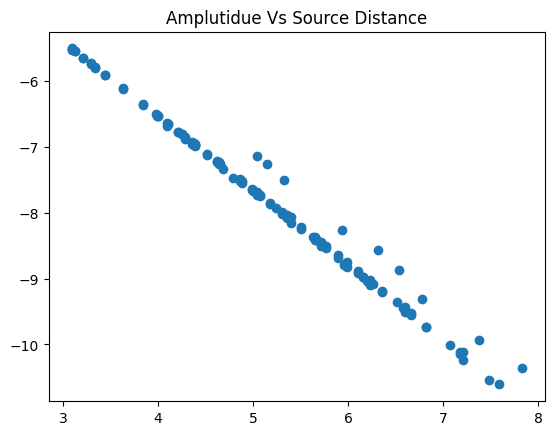

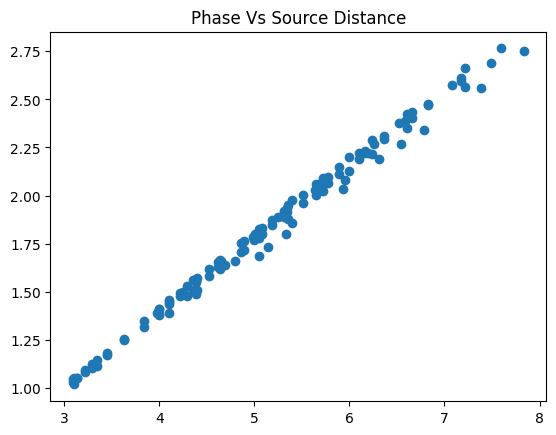

In [53]:
visualize_phase_source(All_DATA_REF[468].astype(np.complex128))

In [43]:
determine_background_optical_property(All_DATA_REF[0].astype(np.complex128), All_DATA_TAR[0].astype(np.complex128))

[0.04278884183671304,
 3.2531815181230126,
 0.04337023745356986,
 3.2095713009204627]

In [44]:
All_ground_truth = [] 
All_measured_data = [] 
All_fine_meshes = []
All_background_optics = []
Target_depth_radius = []


for i in range(len(target_depths)):
    measured_data = All_DATA_TAR[i].astype(np.complex128)
    ref_measured = All_DATA_REF[i].astype(np.complex128)

    depth = target_depths[i]
    radius = target_radiuses[i]
    ua = mua_tars[i]

    #print(depth)
    

    perturbation = (measured_data - ref_measured)/(ref_measured)
    #print(perturbation.shape)
    pert_real = np.real(perturbation)
    pert_imag = np.imag(perturbation) 

    #print(pert_imag.shape) 
    pert = np.concatenate([pert_real, pert_imag], axis = 0)
    #pert = pert.reshape(-1, 14)
    #pert = np.clip(pert, -2, 2)
    #print(pert.shape)
    #break

    array = np.zeros((7, 32,32)) 
    ground_truth = insert_sphere(array, depth, radius, ua)

    array = np.zeros((7, 32,32)) 
    #fine_mesh = insert_elliptical_sphere(array, depth = depth, a_radius = radius*random.uniform(1.5, 2.5), b_radius= radius*random.uniform(1.5, 2.5), c_radius = radius, mua=1)
    fine_mesh = insert_elliptical_sphere(array, depth = depth, a_radius = radius*2, b_radius= radius*2, c_radius = radius, mua=1)
    #insert_sphere(array, depth, radius*random.uniform(1.5, 2.5))
    background_optics = determine_background_optical_property(ref_measured, measured_data)

    if background_optics[0]> 0.015 and background_optics[0] < .095:
        All_ground_truth.append(ground_truth) 
        All_measured_data.append(pert)
        All_fine_meshes.append(fine_mesh)
        All_background_optics.append(background_optics)
        Target_depth_radius.append([depth, radius])


In [45]:
All_ground_truth = np.array(All_ground_truth) 
All_measured_data = np.array(All_measured_data)
All_fine_meshes = np.array(All_fine_meshes)
All_background_optics = np.array(All_background_optics)
Target_depth_radius = np.array(Target_depth_radius)

In [46]:
np.argmin(All_background_optics[:, 0])

1014

In [47]:
max_index = np.argmax(All_background_optics[:, 0])

In [48]:
max_index

468

In [49]:
with open("All_measured_data_phan.npy", "wb") as f: 
    np.save(f, All_measured_data)

with open("All_ground_truth_phan.npy", "wb") as f: 
    np.save(f, All_ground_truth)

with open("All_fine_meshes_phan.npy", "wb") as f: 
    np.save(f, All_fine_meshes)
with open("All_background_optics_phan.npy", "wb") as f: 
    np.save(f, All_background_optics)
with open("Target_depth_radius_phan.npy", "wb") as f: 
    np.save(f, Target_depth_radius)

In [50]:
All_measured_data.shape

(1586, 18, 14)

[0.04278884 3.25318152 0.04337024 3.2095713 ]
0.12


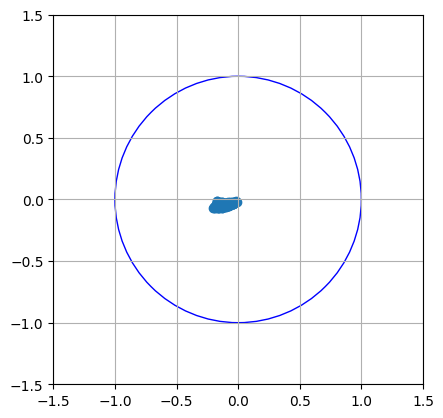

[0.04476663 3.76540782 0.04522961 3.72686429]
0.135


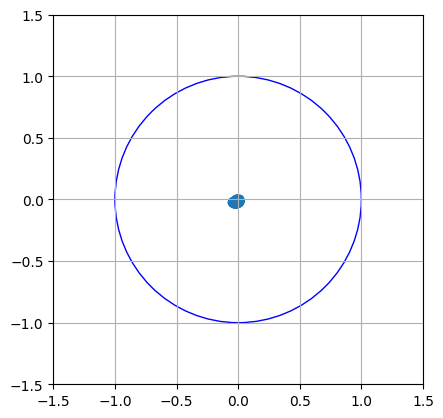

[0.06378175 5.68131309 0.0632591  5.72825207]
0.15


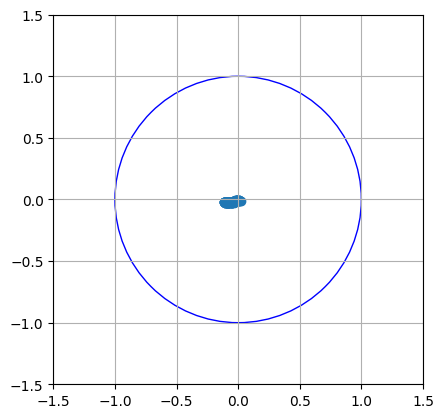

[0.0268558  5.3047099  0.02638487 5.39939064]
0.1649999999999999


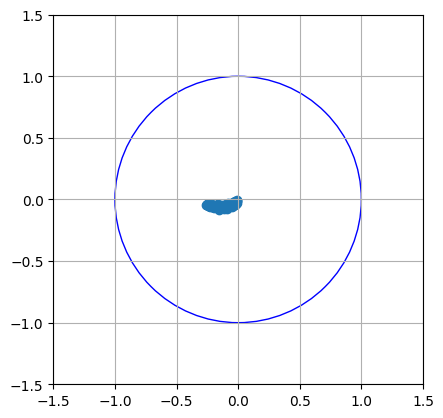

[0.04643727 7.25953783 0.04597038 7.33326735]
0.18


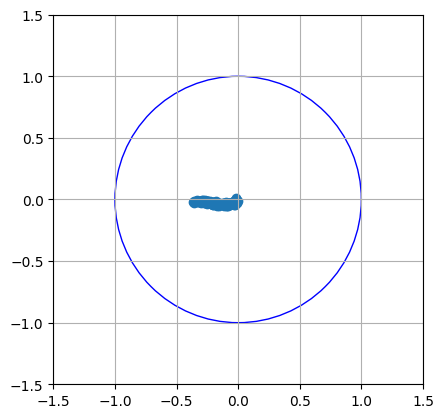

[0.06236421 7.67818783 0.06296087 7.60542444]
0.195


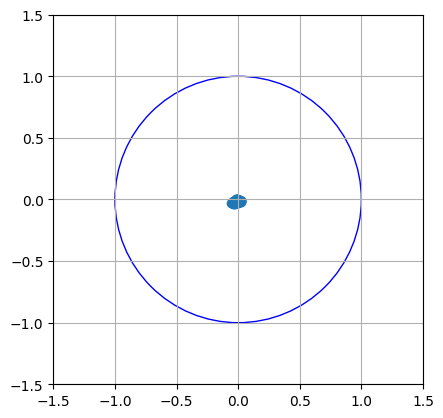

In [51]:
for i in range(0,len(All_background_optics), 300):
    print(All_background_optics[i])
    print(All_ground_truth[i].max())
    # Create a figure and an axis
    fig, ax = plt.subplots()

    # Create and add the circle to the axis
    circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
    ax.add_patch(circle)

    # # Plot the scatter data
    # for data in All_measured_data:
    #     ax.scatter(data[0], data[1])

    
    ax.scatter(All_measured_data[i][:9],All_measured_data[i][9:] )

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Set limits to ensure the circle is centered and visible
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    # Add grid for better visualization
    ax.grid(True)

    # Display the plot
    plt.show()

In [52]:
for i in range(1, 90, 20):
    print(All_background_optics[i])

[0.04278884 3.25318152 0.04339249 3.20792529]
[0.0355846  3.31822373 0.0356618  3.3110405 ]
[0.02778052 3.5361912  0.02743505 3.58072073]
[0.02596866 3.62073935 0.02563091 3.66845156]
[0.03667922 4.98707337 0.03734702 4.8979002 ]
